<a href="https://colab.research.google.com/github/RayYoh/EIE546_Image-Video-Processing/blob/main/EIE546_Image_Video_Processing_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Introduction to EIE546 Video Technology in Python
Lab1 Session  
Speaker: Mr. YAO Lei  
Contributor: Dr. WANG Yi, Mr. YAO Lei, Ms. ZHANG Yi
>This Lab provides an introduction to basic image and video processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python. Knowledge of Python programming is not required for this workshop, but will help.  

*The source of this notebook is located at [here](https://github.com/RayYoh/EIE546_Image-Video-Processing/blob/main/EIE546_Image_Video_Processing_Lab1.ipynb)*

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*

## Image

### Step 1: Load Some Necessary Dependencies
> This step loads some required libraries used in this notebook: **numpy**, **opencv-python**, **yaml**, **matplotlib**, **scipy**, **skimage**.

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Opencv-python](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
* [Pyyaml](https://pyyaml.org/) is a full-featured YAML framework for the Python programming language.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.
* [Scipy](https://scipy.org/) is an open-source software for mathematics, science, and engineering.
* [Skimage](https://scikit-image.org/) scikit-image is a collection of algorithms for image processing.

In [ ]:
import os
import cv2
import yaml
import numpy as np
from scipy.ndimage import convolve
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

### Step 2: Read an Image Config File.
>In this step we will read an image config file from `image.yaml`.  

* The `open(filename, mode)` function is used to open a file in Python and return a file object. It takes two parameters - filename and mode. Mode refers to the mode in which the file has to be opened, such as `'r'` for read mode, `'w'` for write mode, `'a'` for append mode etc. It returns a file object using which you can read, write or append to the file.
* The `yaml.safe_load(f)` function in Python is used to parse a YAML document from a file object safely. It takes a file object `f` as parameter, opened in read mode and parses the YAML contents from that file object.It returns the parsed YAML data as a Python dictionary or list.
1. Open the YAML config file `image.yaml` in read mode.
2. Use `yaml.safe_load(f)` to parse the YAML contents into a Python dictionary cfg.
3. Extract the raw file path, `width` and `height` from the cfg dictionary.
4. Now `raw_file` contains the path to the image file, width and height are extracted as integers to be used later for reshaping the array.
5. The image can then be read and processed using the `raw_file`, `width` and `height` variables initialized from the YAML config.

In [ ]:
with open('image.yaml', 'r') as f:
  cfg = yaml.safe_load(f)

raw_file, width, height = cfg['InputFile'], cfg['Width'], cfg['Height']

### Step 3: Read Image and Display
> In this step we will read an image from `FourPeople_1280x720.raw`, and display it.  

`*.raw` reads an image in YUV format, which needs to be converted to the BGR domain for display. Please note the difference in RGB and BGR format. The default input color channels are in BGR format for OpenCV.
1. `np.fromfile` reads the raw YUV data from the file into a NumPy array, with 8-bit unsigned integers (0-255 range).
2. `yuv_image.reshape` reshapes the flat array into a 2D image with appropriate height and width based on YUV 4:2:0 format.
3. `cv2.cvtColor` converts the YUV image to BGR color space.
4. Another `cvtColor` converts BGR to RGB for better display.
5. `matplotlib` is used to display the BGR and RGB image side-by-side.
***Questions:***
* Explain what the YUV color space consists of and how it differs from the RGB color space.
* The `cv2.cvtColor` function implements conversion between different color spaces. Explain how this function works.
* The YUV image data is reshaped to (height * 3 // 2, width) size. Explain the purpose of this step.

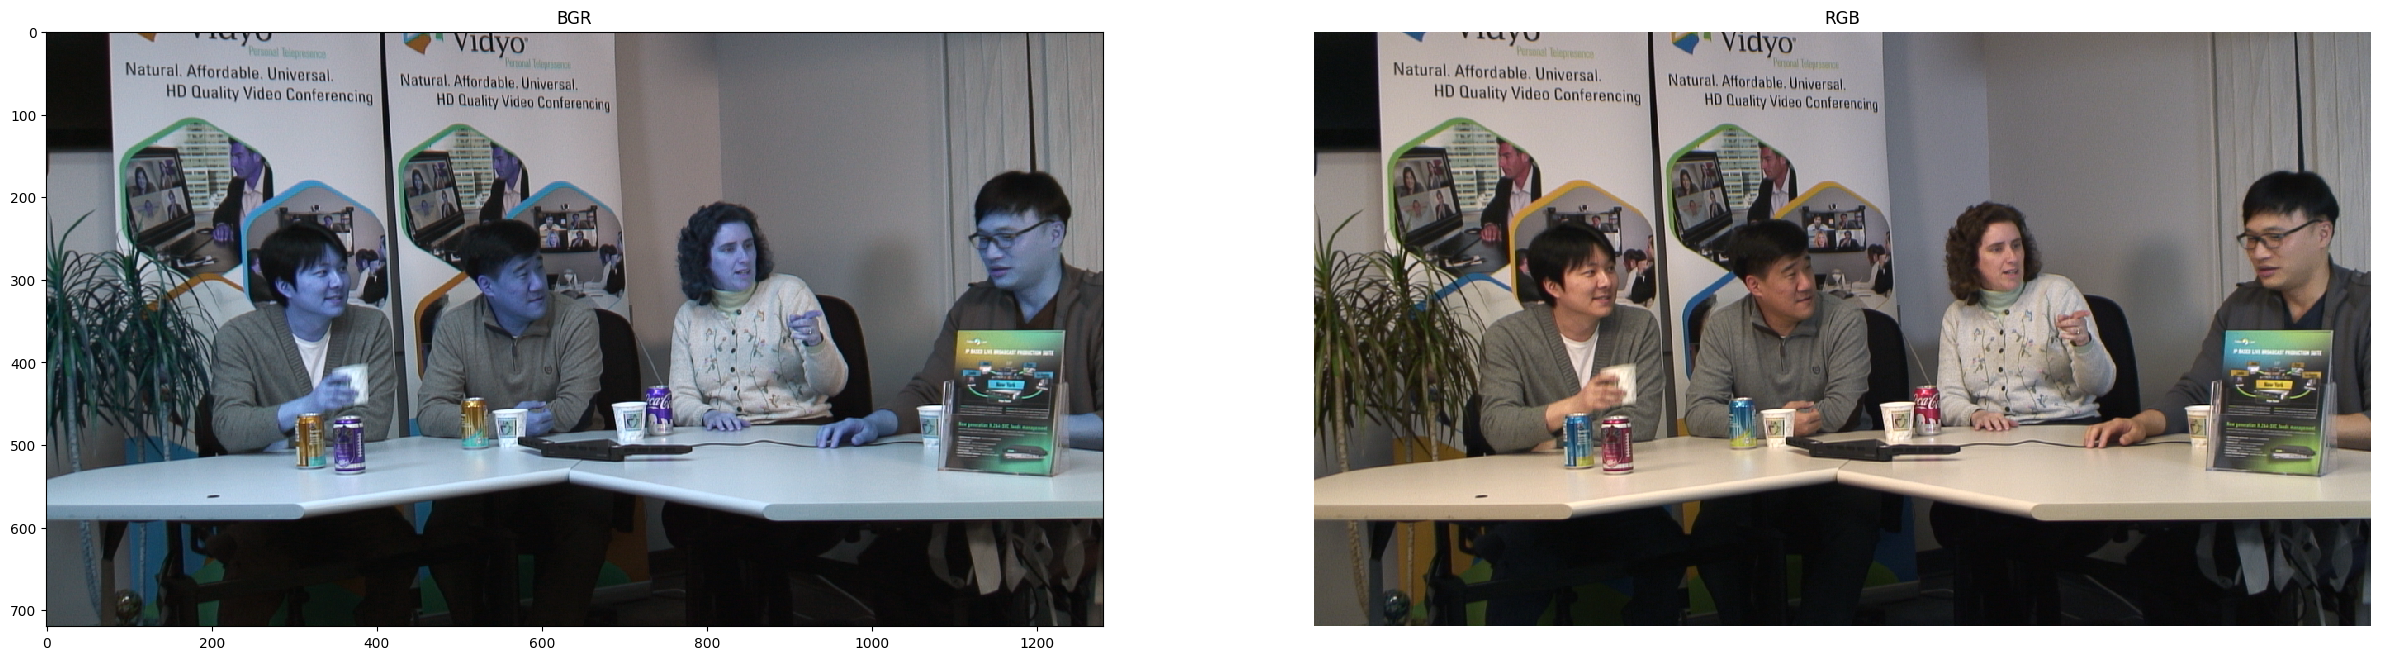

In [ ]:
yuv_image = np.fromfile(raw_file, dtype=np.uint8)
yuv_image = yuv_image.reshape((height * 3 // 2, width))

bgr_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR_I420)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
f, (plt1, plt2) = plt.subplots(1, 2, figsize=(30, 30))
plt1.set_title('BGR');plt1.imshow(bgr_image, interpolation='nearest')
plt2.axis('off'); plt2.set_title('RGB'); plt2.imshow(rgb_image, interpolation='nearest')

### Step 4: Display GrayScale Image
> In this step we will modify YUV to make the image grayscale in the BGR domain.  

1. `yuv_gray` makes a copy of the original yuv_image array.
2. It then slices the `yuv_gray` array from `height` to end. Sets all values in this slice to 128 which represents gray in YUV.
3. The Y channel up to height rows remains unchanged. U and V channels after height are set to 128 hence become gray.
4. Convert this gray YUV to BGR for display. `imshow` displays the grayscale image.
***Questions:***  
* The YUV color space separates luma (Y) and chroma (UV) components. Why is setting the UV channel to 128 useful for generating a grayscale image?

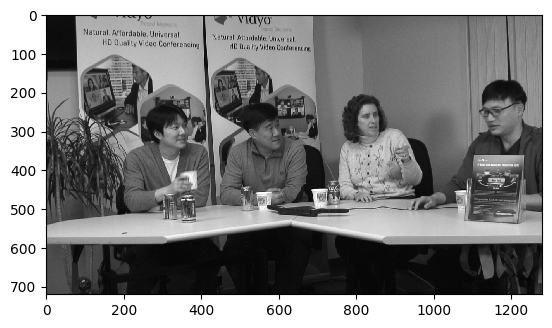

In [ ]:
yuv_gray = yuv_image.copy()
yuv_gray[height:][:] = 128

gray_image = cv2.cvtColor(yuv_gray, cv2.COLOR_YUV2BGR_I420)
plt.imshow(gray_image, interpolation='nearest')

### Step 5: Display Flipped Image
> In this step we will modify YUV to make the image flipped in the BGR domain.  

* `np.flip()` function in NumPy is used to flip or reverse the order of elements in an array along a specified axis. It takes an array and an integer axis as input. The axis indicates the dimension along which flipping is to be done. It reverses the order of elements along the given axis. The original array is not changed, instead a new flipped array is returned. Axes 0 and 1 represent vertical and horizontal flipping respectively for 2D arrays.  
* `np.vstack()` is a function in NumPy that is used to vertically stack arrays. It concatenates arrays along the first axis (axis 0). It requires input arrays to have same number of columns. Stacking is done along axis 0 by default. It returns a new array containing the stacked rows and original arrays remain unchanged.
1. Take a copy of the original YUV image array.
2. Extract Y, U and V channels by slicing based on standard YUV 4:2:0 dimensions.
3. Flip each channel array vertically using `np.flip(axis=0)`.
4. Flip them horizontally using `np.flip(axis=1`).
5. Stack the flipped Y, U and V channels back together into a full YUV array.
6. Convert flipped YUV to BGR for visualization.
7. Convert BGR to RGB for correct color display.
8. Display the resulting flipped image with `imshow()`.
***Questions:***  
* Explain how the `np.flip` function is used to flip the YUV image.
* Propose an image processing technique that could be applied to the flipped image. Give example code.

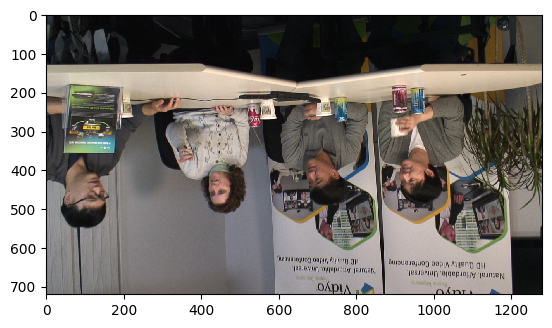

In [ ]:
yuv_flipped = yuv_image.copy()
y_flipped = np.flip(np.flip(yuv_flipped[:height][:], axis=0), axis=1)
u_flipped = np.flip(np.flip(yuv_flipped[height:int(height * 1.25)][:], axis=0), axis=1)
v_flipped = np.flip(np.flip(yuv_flipped[int(height * 1.25):][:], axis=0), axis=1)
yuv_flipped = np.vstack([y_flipped, u_flipped, v_flipped])
flip_bgr_image = cv2.cvtColor(yuv_flipped, cv2.COLOR_YUV2BGRA_I420)
flip_rgb_image = cv2.cvtColor(flip_bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(flip_rgb_image, interpolation='nearest')

### Step 6: Image as a 3D Array
> In this step we will visualize and compare the RGB channels of an image using matplotlib.  

1. Read lena image as unchanged with alpha channel using cv2.
2. Convert it from BGR to RGB for correct color representation.
3. Create a figure with 1 row and 4 columns of plots using `subplots`.
4. Set a large figsize for better visibility.
5. Plot the original RGB image in the first subplot.
6. Slice just the R channel and plot as grayscale in subplot 2.
7. Similarly, visualize G and B channels in grayscale in subsequent plots.
8. Turn off axes and set titles for each subplot.
***Questions:***
* Compare the three grayscale channel visualizations. Describe any differences observed in image features/quality across the channels.
* How could the channel splitting visualization be extended to other color spaces like HSV? Provide sample code.

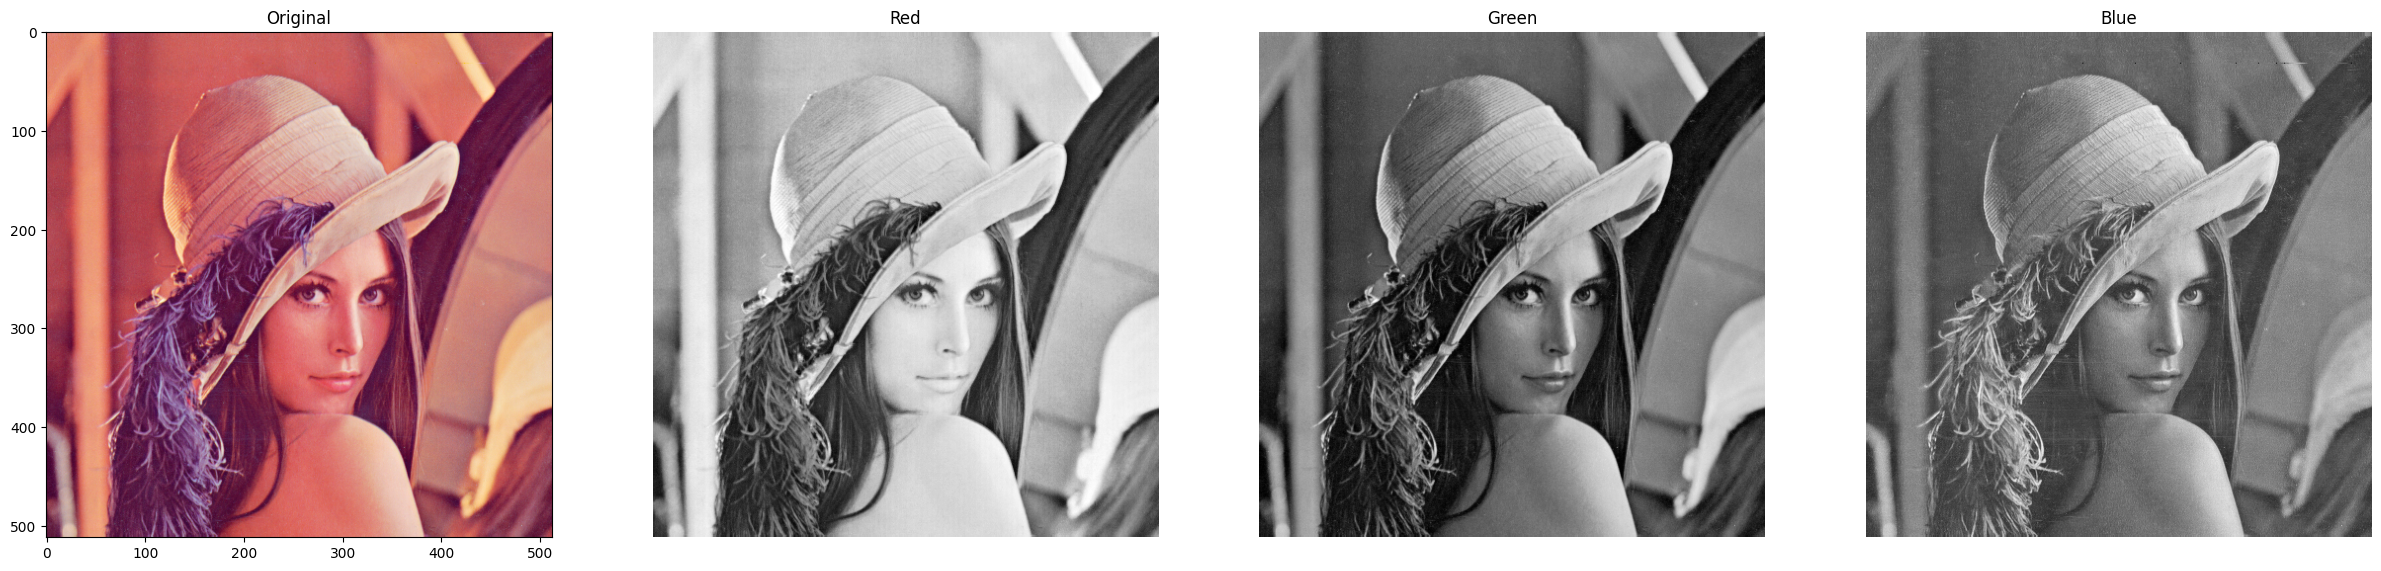

In [ ]:
lena = cv2.imread('lena.png', cv2.IMREAD_UNCHANGED)
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(30, 30))

plt1.set_title('Original'); plt1.imshow(lena_rgb);
plt2.axis('off'); plt2.set_title('Red'); plt2.imshow(lena_rgb[:,:,0], cmap='gray');
plt3.axis('off'); plt3.set_title('Green'); plt3.imshow(lena_rgb[:,:,1], cmap='gray');
plt4.axis('off'); plt4.set_title('Blue'); plt4.imshow(lena_rgb[:,:,2], cmap='gray');

> We will extract and visualize zoomed-in regions from the Lena image using array slicing and matplotlib.  

1. Create a figure with 4 subplots again to arrange images.
2. Extract head region coordinates from full image.
3. Slice head from the Lena RGB array using those coordinates.
4. Similarly, extract eye region from head and zoom further for `zoomed_eye`.
5. Plot original Lena image in first subplot. Visualize head, eye and zoomed eye regions in subsequent plots.
6. Turn off axes and use nearest neighbor interpolation for pixelated look.

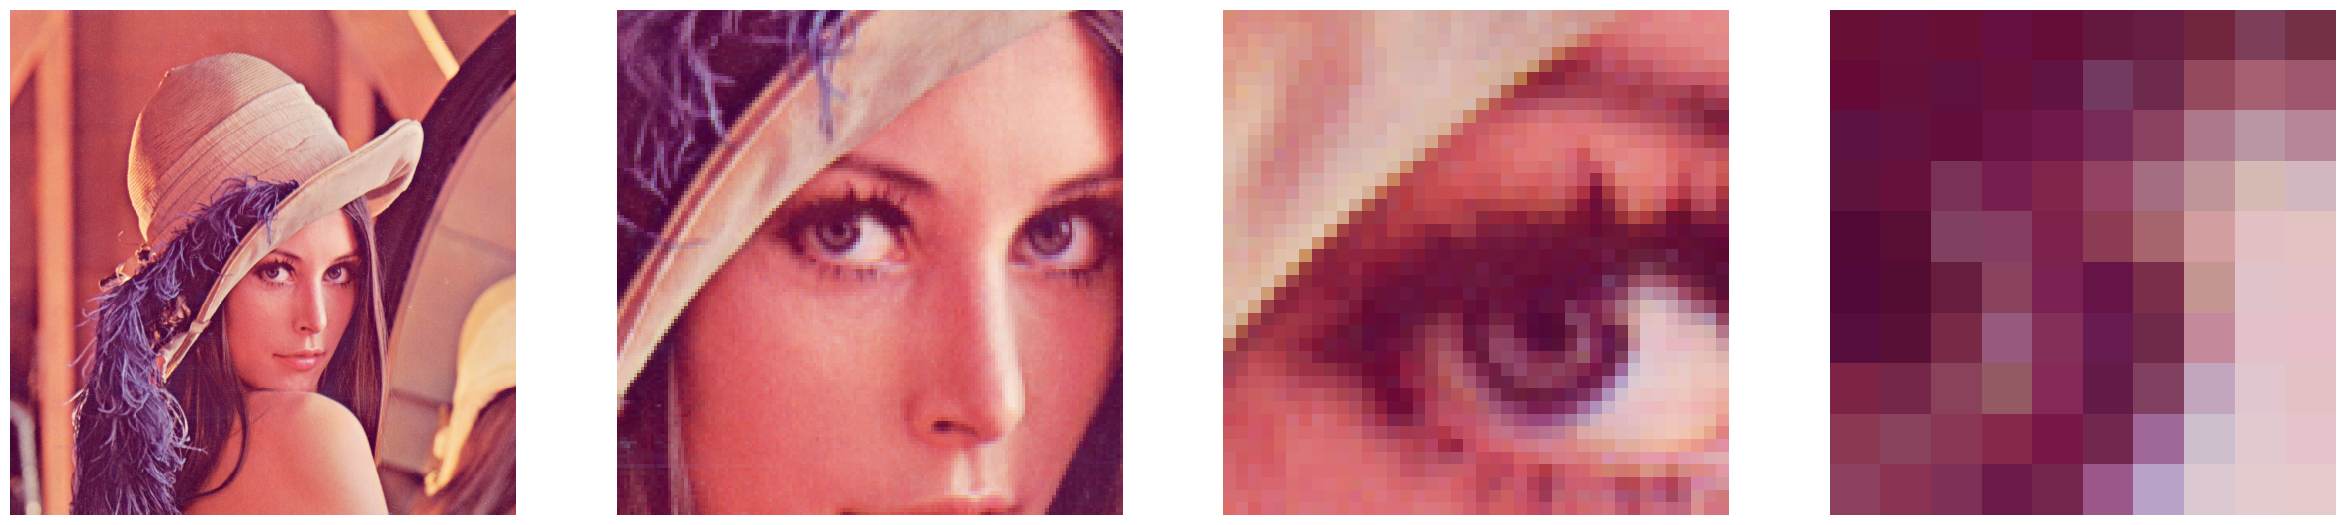

In [ ]:
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(30, 30))

head = lena_rgb[200:350, 200:350]
eye = head[40:80, 40:80]
zoomed_eye = eye[20:30, 25:35]

plt1.axis('off'); plt1.imshow(lena_rgb, interpolation='nearest');
plt2.axis('off'); plt2.imshow(head, interpolation='nearest');
plt3.axis('off'); plt3.imshow(eye, interpolation='nearest');
plt4.axis('off'); plt4.imshow(zoomed_eye, interpolation='nearest');

Here are the printed RGB pixel intensity values at x=3, y=3 in the zoomed eye region.

In [ ]:
latest_pixel = zoomed_eye[3, 3]
print("R intensity at x=3, y=3 is", round(latest_pixel[0]))
print("G intensity at x=3, y=3 is", round(latest_pixel[1]))
print("B intensity at x=3, y=3 is", round(latest_pixel[2]))

R intensity at x=3, y=3 is 118
G intensity at x=3, y=3 is 31
B intensity at x=3, y=3 is 78


### Step 7: Filters
1. Apply convolution on Lena's grayscale R channel using 3 different kernels - edge detect, sharpen and blur.
2. Create 4 subplots to visualize the results.
3. Plot original Lena R channel in first subplot. Show convolution outputs in next 3 plots - detecting edges, sharpening and blurring the image.
4. Use grayscale colormap and nearest neighbor interpolation.
5. Turn off axes and add titles.
***Questions:***
* Explain how convolution is used with different kernels to perform edge detection, sharpening, and blurring on the grayscale image.
* Propose another image filter to implement beyond the three shown. Give the kernel values and explain the expected effect.

In [ ]:
kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                 [-1.,8.,-1.],
                 [-1.,-1.,-1.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
               [-1.,9.,-1.],
               [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
             [1.,1.,1.],
             [1.,1.,1.]])

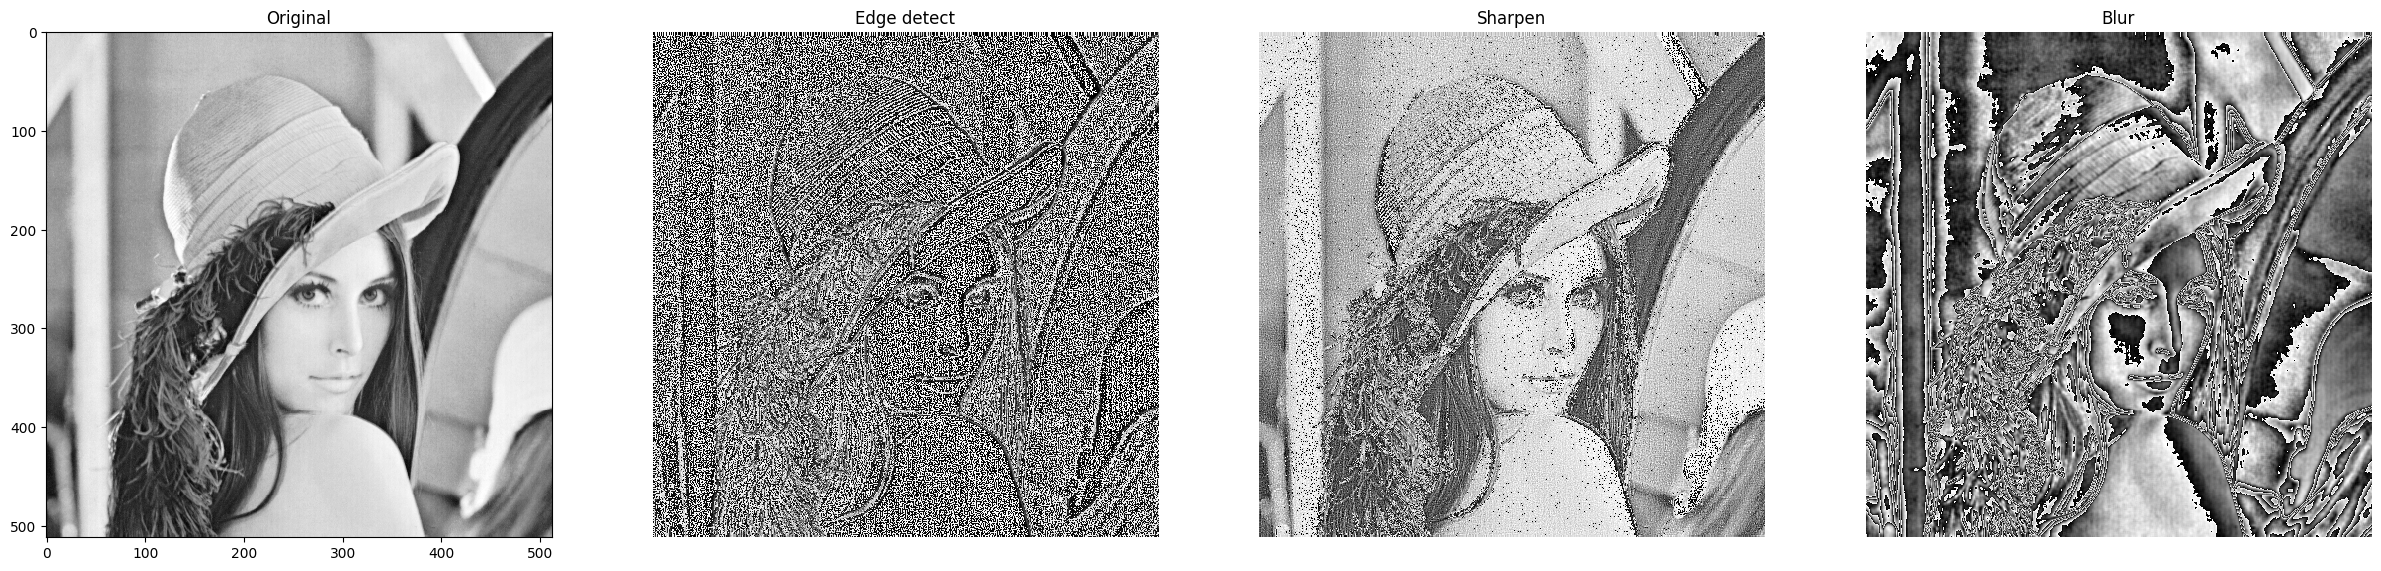

In [ ]:
img_edge_detect = convolve(lena_rgb[:,:,0], kernel_edge_detect3)
img_sharpen = convolve(lena_rgb[:,:,0], kernel_sharpen2)
img_blur = convolve(lena_rgb[:,:,0], kernel_blur)

f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(30,30))

plt1.set_title('Original');plt1.imshow(lena_rgb[:,:,0],cmap='gray', interpolation='nearest');
# showing each channel img[x,y,color_plane]
plt2.axis('off');plt2.set_title('Edge detect');plt2.imshow(img_edge_detect,cmap='gray', interpolation='nearest');
plt3.axis('off');plt3.set_title('Sharpen');plt3.imshow(img_sharpen,cmap='gray', interpolation='nearest');
plt4.axis('off');plt4.set_title('Blur');plt4.imshow(img_blur,cmap='gray', interpolation='nearest');

### Step 8: PNSR
Some key mathematical equations behind PSNR calculation:  
Mean Squared Error (MSE):
$$MSE = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^2$$
where:
- `m, n` are image dimensions
- `I` is the original image
- `K` is the processed image  

This calculates the average squared difference between corresponding pixels.  
Peak Signal-to-Noise Ratio (PSNR):
$$PSNR = 10 \log_{10}\left(\frac{MAX_I^2}{MSE}\right)$$
Where:
- `MAX_I` is maximum possible pixel value (255 for 8-bit)
- `MSE` is mean squared error  

Combining the two equations:
$$PSNR = 20 \log_{10}\left(\frac{255}{\sqrt{MSE}}\right)$$
So PSNR represents the ratio between maximum signal power and noise power in decibels.  
These quantify the quality of the processed image compared to the original. Higher PSNR indicates better quality of the processed image compared to the original.    

1. We pass the original Lena R channel image and the blurred image to the `peak_signal_noise_ratio()` function.
2. This function calculates the peak signal-to-noise ratio (PSNR) between the two images.
3. PSNR represents the ratio between the maximum possible signal power and the power of the noise/errors. It is calculated using the mean squared error between the images.
***Questions:***
* Explain how PSNR is calculated mathematically between two images. Discuss the purpose of this metric.
*  Compare PSNR values obtained using different blurring kernels and parameters. How does kernel design impact measured quality?

In [ ]:
psnr = peak_signal_noise_ratio(lena_rgb[:,:,0], img_blur)
print('PSNR: ', psnr)

PSNR:  7.936155156249213


## Video
Video

### Step 1: Read a Video Config File.
>In this step we will read an video config file from `video.yaml`.

In [ ]:
with open('video.yaml', 'r') as f:
  cfg = yaml.safe_load(f)

raw_file, width, height, fp = cfg['InputFile'], cfg['Width'], cfg['Height'], cfg['FrameRate']
f = open(raw_file, 'rb')
file_size = os.path.getsize(raw_file)
n_frames = file_size // (width * height * 3 // 2)

### Step 2: Display Some Frames of a Video

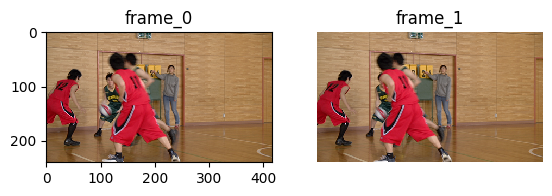

In [ ]:
rgb_list = []
for i in range(n_frames):
  yuv_video = np.frombuffer(f.read(width * height * 3 // 2), dtype=np.uint8)
  yuv_video = yuv_video.reshape((int(height * 3 / 2), width))
  bgr_video = cv2.cvtColor(yuv_video, cv2.COLOR_YUV2BGR_I420)
  rgb_video = cv2.cvtColor(bgr_video, cv2.COLOR_BGR2RGB)
  rgb_list.append(rgb_video)

f, (plt1, plt2) = plt.subplots(1, 2)
plt1.set_title('frame_0');plt1.imshow(rgb_list[0], interpolation='nearest')
plt2.axis('off'); plt2.set_title('frame_1');plt2.imshow(rgb_list[1], interpolation='nearest')